# ***TITANIC SURVIVAL PREDICTION***

#  **Objective of the Study:**



*   Understand the Dataset and cleanup.
*   Build a strong classification model to predict whether the passenger survives or not.







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project/TITANIC SURVIVAL PREDICTION/tested.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**Attribute Information:**


*   PassengerId : Passenger Number

*   Survived : Whether survived or not: 0=No, 1=Yes .

*   Pclass : Ticket class

*   Name : Name of the Passenger .
*   Sex : Gender


*   Age : Age of passenger.


*   SibSp : Number of siblings.


*   Parch : Number of parents.

*   Ticket : Ticket number.
*   Fare : Passenger fare.





In [ ]:
data.shape

(418, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
data = data.drop_duplicates()
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
list = ['Survived','Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

for i in list:
  print(data[i].unique(),i)
  print('-----------------------')

[0 1] Survived
-----------------------
[3 2 1] Pclass
-----------------------
['male' 'female'] Sex
-----------------------
[34.5  47.   62.   27.   22.   14.   30.   26.   18.   21.     nan 46.
 23.   63.   24.   35.   45.   55.    9.   48.   50.   22.5  41.   33.
 18.5  25.   39.   60.   36.   20.   28.   10.   17.   32.   13.   31.
 29.   28.5  32.5   6.   67.   49.    2.   76.   43.   16.    1.   12.
 42.   53.   26.5  40.   61.   60.5   7.   15.   54.   64.   37.   34.
 11.5   8.    0.33 38.   57.   40.5   0.92 19.   36.5   0.75  0.83 58.
  0.17 59.   14.5  44.    5.   51.    3.   38.5 ] Age
-----------------------
[0 1 2 3 4 5 8] SibSp
-----------------------
[0 1 3 2 4 6 5 9] Parch
-----------------------
['330911' '363272' '240276' '315154' '3101298' '7538' '330972' '248738'
 '2657' 'A/4 48871' '349220' '694' '21228' '24065' 'W.E.P. 5734'
 'SC/PARIS 2167' '233734' '2692' 'STON/O2. 3101270' '2696' 'PC 17603'
 'C 17368' 'PC 17598' 'PC 17597' 'PC 17608' 'A/5. 3337' '113509' '2698'

In [ ]:
list = ['Survived','Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

for i in list:
  print(data[i].value_counts())
  print('-----------------------')

0    266
1    152
Name: Survived, dtype: int64
-----------------------
3    218
1    107
2     93
Name: Pclass, dtype: int64
-----------------------
male      266
female    152
Name: Sex, dtype: int64
-----------------------
21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64
-----------------------
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64
-----------------------
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64
-----------------------
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: Ticket, Length: 363, dtype: int64
-----------------------
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
2

In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
data.isnull().sum()/len(data)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [ ]:
# droping unnecessary columns

data = data.drop(['PassengerId','Name','Cabin','Ticket','Fare'],axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,34.5,0,0,Q
1,1,3,female,47.0,1,0,S
2,0,2,male,62.0,0,0,Q
3,0,3,male,27.0,0,0,S
4,1,3,female,22.0,1,1,S
...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,S
414,1,1,female,39.0,0,0,C
415,0,3,male,38.5,0,0,S
416,0,3,male,NaN,0,0,S


In [ ]:
data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [ ]:
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])

In [ ]:
data['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [ ]:
data.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Embarked    False
dtype: bool

In [ ]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [ ]:
data['Age'] = data['Age'].astype(int)

In [ ]:
data.dtypes

Survived     int64
Pclass       int64
Sex         object
Age          int64
SibSp        int64
Parch        int64
Embarked    object
dtype: object

# **DATA VISUALIZATION**

In [ ]:
percentage_of_survival = data['Survived'].value_counts(normalize=True)*100

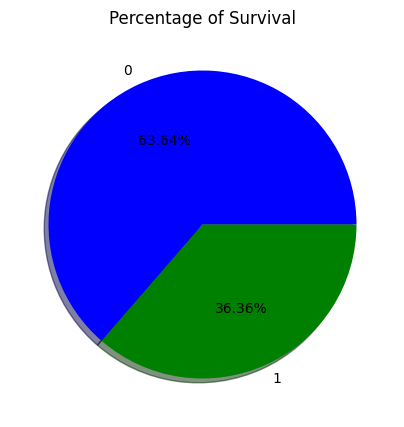

In [ ]:
plt.figure(figsize=(5,5))
label = data['Survived'].unique()

plt.pie(percentage_of_survival,labels=label,shadow=True,autopct='%1.2f%%',colors=['b','g'])
plt.title('Percentage of Survival')
plt.show()

**OBSERVATION**

*   Percentage of survived people is less



<Axes: xlabel='Survived', ylabel='Age'>

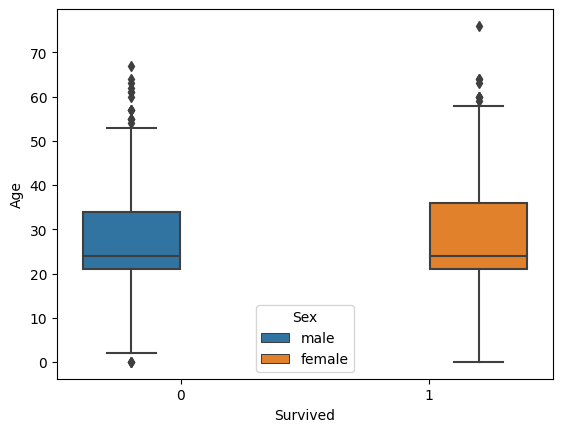

In [ ]:
sns.boxplot(x='Survived',y='Age',data=data,hue='Sex')

**OBSERVATION**


*   Males whose age between 20 and 40 are survived most.



# **Encoding categorical values to numerical**


In [ ]:
data = pd.get_dummies(data,columns=['Embarked','Sex'],drop_first=True)
data

,Survived,Pclass,Age,SibSp,Parch,Embarked_Q,Embarked_S,Sex_male
0,0,3,34,0,0,1,0,1
1,1,3,47,1,0,0,1,0
2,0,2,62,0,0,1,0,1
3,0,3,27,0,0,0,1,1
4,1,3,22,1,1,0,1,0
...,...,...,...,...,...,...,...,...
413,0,3,21,0,0,0,1,1
414,1,1,39,0,0,0,0,0
415,0,3,38,0,0,0,1,1
416,0,3,21,0,0,0,1,1


# **Spliting Independent and Dependent Features**

In [ ]:
x = data.drop(['Survived'],axis=1)
x

,Pclass,Age,SibSp,Parch,Embarked_Q,Embarked_S,Sex_male
0,3,34,0,0,1,0,1
1,3,47,1,0,0,1,0
2,2,62,0,0,1,0,1
3,3,27,0,0,0,1,1
4,3,22,1,1,0,1,0
...,...,...,...,...,...,...,...
413,3,21,0,0,0,1,1
414,1,39,0,0,0,0,0
415,3,38,0,0,0,1,1
416,3,21,0,0,0,1,1


In [ ]:
y=data['Survived']
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

# **TRAIN-TEST SPLITTING**



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

**STANDARDIZATION**
* Standardization which helps you to scale down your feature based on standard normal distribution.  

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# **MODEL CREATION**

**1. K-NEAREST NEIGHBOR (KNN) :**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

y_pred1=knn_model.predict(x_test)
y_pred1

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred1)
print(result)
labels=[0,1]
cmd = ConfusionMatrixDisplay(result,display_labels=labels)

[[45  0]
 [ 1 38]]


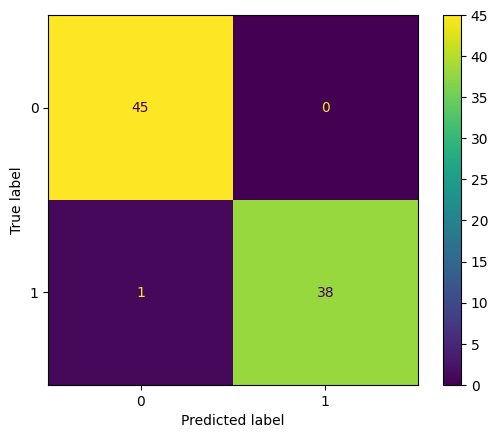

In [ ]:
cmd.plot()

In [ ]:
# Accuracy score and classification report

from sklearn.metrics import accuracy_score,classification_report

print('Accuracy: ',accuracy_score(y_test,y_pred1)*100,'\n')
print(classification_report(y_test,y_pred1))

a=accuracy_score(y_test,y_pred1)

Accuracy:  98.80952380952381 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.97      0.99        39

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



In [ ]:
training_score = knn_model.score(x_train,y_train)
training_score

0.9940119760479041

**2. RANDOM FOREST :**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5,max_features=5)
forest_model.fit(x_train,y_train)
y_pred2 = forest_model.predict(x_test)
y_pred2


array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred2)
print(result)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)

[[45  0]
 [ 0 39]]


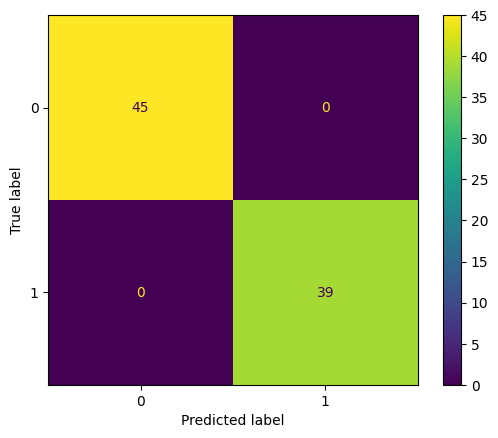

In [ ]:
cmd.plot()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

print('Accuracy: ',accuracy_score(y_test,y_pred2)*100,'\n')
print(classification_report(y_test,y_pred2))

Accuracy:  100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        39

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [ ]:
training_score = forest_model.score(x_train,y_train)
training_score

1.0

**3. SUPPORT VECTOR MACHINE LEARNING ALGORITHM :**

In [ ]:
from sklearn.svm import SVC

sv_model=SVC()
sv_model.fit(x_train,y_train)
y_pred3=sv_model.predict(x_test)
y_pred3

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred3)
print(result)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)

[[45  0]
 [ 1 38]]


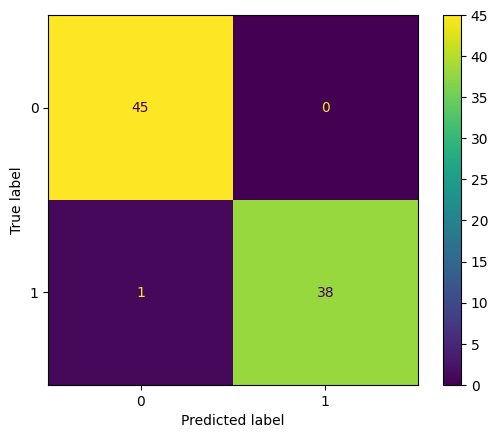

In [ ]:
cmd.plot()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

d=accuracy_score(y_test,y_pred3)
print('Accuracy: ',d*100,'\n')
print(classification_report(y_test,y_pred3))

Accuracy:  98.80952380952381 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.97      0.99        39

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



In [ ]:
training_score = sv_model.score(x_train,y_train)
training_score

1.0

**OBSERVATION**



*   Here, Random Forest model has highest accuracy. So we can take it as a best model.




# **PREDICTION**

In [ ]:
forest_model.predict([[3,22,1,0,7.2500,0,1]])

array([0])

# **CONCLUSION**



*   From the performance evaluation given in the classification report, we got that Random Forest model has the highest accuracy.Also F1 and recall scores are also good , which make it as the best model in this case.




# ***`Thank You`***